# What is PCA 

Principle Component Analysis (PCA) is a fundamental method used to reduce the dimensionality of a problem. This is desirable for many reasons most notably improving computational tracability. 

Once in the lower dimensional space machine learning techniques can be used as normal such as clustering, neural networks etc. The value of the principle components denotes how important/much information is given by one of the orthogonal directions in this new basis. Therefore, we reduce dimensions by discarding directions with small principle components/importantance. 

I hope that this article is different to other PCA articles on medium as it motivates the problem algebraicly aswell as geometrically which is not something I have seen elsewhere.

#  Representing data

Multivariate data can be represented by a matrix, $\mathbf{A}$, with each row being a datapoint and each column being a different parameter. The covariance matrix of the data is proportional to $\mathbf{A
^TA}$. This fact is true as can be seen below for the case where the mean is zero for all params

$$\text{data} = \mathbf{A^TA} = \begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \end{bmatrix}\begin{bmatrix} x_1 & y_1 \\ x_2 & y_2 \\ x_3 & y_3 \end{bmatrix} = \begin{bmatrix} \sum_i x_i^2 & \sum_i x_iy_i \\ \sum_i y_ix_i & \sum_i y_i^2 \end{bmatrix} $$


# Covariance in PCA


The singular value decomposition (SVD) is a generalisation of the eigendecomposition for non-square matrices and for an $M \times N$ matrix is given by $\mathbf{U \Sigma V^T}$ with $\mathbf U$ having shape $M \times M$, $\mathbf \Sigma$ having shape $M \times N$ and $\mathbf V$ having shape $N \times N$. Using the SVD for the data and the fact that the covariance is proportional to $\mathbf{A^T A}$, we show the following:

$$\text{data} = \mathbf{A} = \mathbf{U \Sigma V^T}$$
$$\text{covar(data)} \propto \mathbf{A^TA} = \mathbf{V \Sigma^T U^T U \Sigma V^T} = \mathbf{V \Sigma^T \Sigma V^T}$$
$$\text{Since } \mathbf U \text{ is unitary so } \mathbf{U^T U} = \mathbf I$$



Comparing to equation x we see that this is the eigendecomposition for the covariance. The $\Sigma$ matrix is non-square but $\Sigma^T \Sigma$ is square as shown. 

$$ \mathbf{\Sigma^T \Sigma} = \begin{bmatrix} \sigma_1  & 0 & 0 \\ 0 & \sigma_2 & 0 \end{bmatrix} \begin{bmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \\ 0 & 0 \end{bmatrix} = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}$$

The eigenvalues of the covariance matrix are the singular values squared, therefore there is an equivilance between the singular values and standard deviation. 


So the principle components of the data are the standard deviations (i.e. the square root of the variance) in the orthogonal directions given by the eigenvectors of the covariance matrix (why this?).  

stress here that the singular value is therefore the same as the standard deviation and that is important! why does this mean more information in this direction? why is stdev information.

explain that SVD is actually quicker in reality to fin

- V is the matrix of eigenvectors/principle component directions
- want square root of the eigenvalues of the covariance matrix
- want to eigenvectors of the covariance matrix 
- happens to be given by the SVD and is much quicker to run so from now on do it this way 

# In 2D 

- four points
- change in the y = x and y = -x directions 
- y = x twice as big 
- see that the eigenvectors are as expected and then the singular values too
- go to many points that have the same underlying correlation but on greater scale (how to call these Gaussians?)

In a toy example in 2D there are four points plotted which can be represented by the data matrix below. Plotting the eigenvectors of the covariance matrix scaled by the standard deviation (singular value) in that direction we get the following basis vectors.


$$\text{data} = \mathbf A = \begin{bmatrix} 1 & 1 \\ -1 & -1 \\ 0.5 & -0.5 \\ -0.5 & 0.5 \end{bmatrix}$$

It is possible to transform the coordinates of the data matrix into the principle component basis 

V A V^T

We see that if we do the same but for a few hundred correlated gaussian data points the same principle components and directions are seen.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.autolayout"] = True

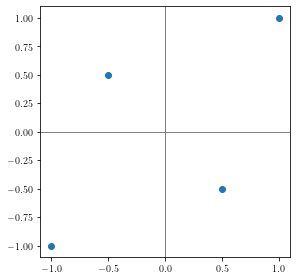

In [20]:
# first plot the points 
data = np.array([
    [1,1],
    [-1,-1],
    [0.5,-0.5],
    [-0.5,0.5],
])

x, y = zip(*data)

plt.scatter(x,y)
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [21]:
covar = data.T @ data

covar

array([[2.5, 1.5],
       [1.5, 2.5]])

In [22]:
eigenvals, eigenvecs = np.linalg.eig(covar)

eigenvals, eigenvecs

(array([4., 1.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [23]:
U, w, Vt = np.linalg.svd(data)

w, Vt

(array([2., 1.]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

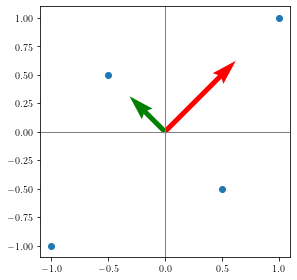

In [24]:
# plot principal components
eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, prin_comp[0], prin_comp[1], color=['r','g'], scale=5, width=0.02)

plt.scatter(x,y)
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

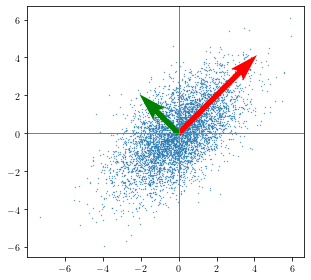

In [25]:
# now plot with may points
mean = np.zeros(2)
data = np.random.multivariate_normal([0,0], covar, size=5000)

x, y = zip(*data)

plt.scatter(x,y, s=0.1)

eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, prin_comp[0], prin_comp[1], color=['r','g'], scale=5, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

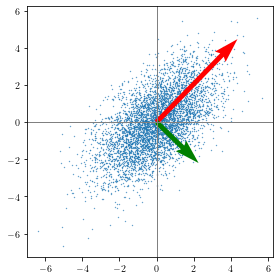

In [65]:
# now plot with may points
mean = np.zeros(2)
data = np.random.multivariate_normal([0,0], covar, size=5000)

x, y = zip(*data)
plt.scatter(x,y, s=0.1)

# from now on use SVD as is quicker
U, w, Vt = np.linalg.svd(data)
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, w * Vt[:,0], w * Vt[:,1], color=['r','g'], scale=300, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

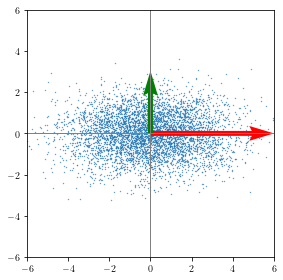

In [93]:
# project the data into the principle component frame
projected_data = (Vt @ data.T).T
plt.scatter(projected_data[:,0], projected_data[:,1], s=0.1)

# plot the principle component directions in the principle component basis (sanity check)
origin = np.array([[0, 0],[0, 0]]) # origin point
w = w/np.max(w)
plt.quiver(*origin, w[0] * Vt @ Vt[0], w[1] * Vt @ Vt[1], color=['r','g'], scale=2, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Reducing the dimensions

- give an example of points that are on a straight line
- then say same thing in 3d
- project onto the largest two principle components

- do the 2d plot 
- do the projection into 2d plot

As mentioned earlier, PCA is such a powerful tool as you just get rid of the principle component directions that do not carry that much information (small standard deviation/singular value). 

In two dimensions, if all the points lie on a line, there is a set relationship between the x and y variables, meaning one of them is redundant. In the case below where y = x, we can reduce to a single dimension by projecting the points into the principle component frame y=x and discard the second as the singular value is zero in the orthogonal y=-x direction.

Looking at some data in three dimensions and plotting the scaled principle component directions, we see that there is one direction that doesn't carry nearly as much information as the other two. In this case you just project the datapoints onto the principle component directions of the larger two singular values only.




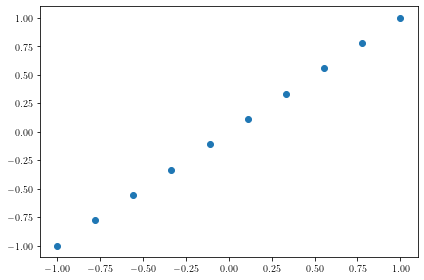

In [97]:
x = np.linspace(-1,1,10)
y = x 
plt.scatter(x, y)
plt.show()

/var/folders/yr/nz2d8_8n42g11zxgd7yjxhq40000gn/T/ipykernel_12037/2438495147.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal([0,0,0], covar_3d, size=100)


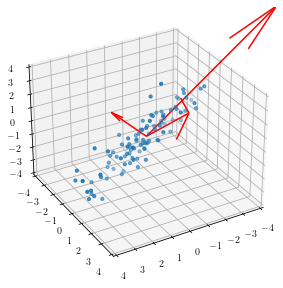

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

covar_3d = [
    [5,4,1],
    [4,5,4],
    [1,4,5]
]

data = np.random.multivariate_normal([0,0,0], covar_3d, size=100)
x, y, z = data.T

ax.scatter3D(x,y,z,s=10, marker='o')

covar = np.cov(data.T)
eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0,0,0],[0,0,0], [0,0,0]]) # origin point
ax.quiver(*origin, prin_comp[0], prin_comp[1], prin_comp[2], length=5, color='r')#, normalize=True)#, width=0.02)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-4,4)
ax.view_init(30, 60)
plt.show()

In [10]:
# find eigenstuff of 3d dataset 
covar = np.cov(data.T)
eigenvals, eigenvecs = np.linalg.eig(covar)

eigenvals, eigenvecs

(array([14.15261131,  4.13138108,  0.1993556 ]),
 array([[-0.53756078, -0.71190374,  0.45190869],
        [-0.65658026,  0.01711559, -0.75406195],
        [-0.52908484,  0.70206846,  0.47662261]]))

In [40]:
data_prime = Vt @ data @ Vt.T
plt.scatter(data_prime[0], data_prime[1], s=0.1)

# make it so that the vector cannot be negative
#prin_comp = Vt.T @ prin_comp.T
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, Vt @ prin_comp.T[0], Vt @ prin_comp.T[1], color=['r','g'], scale=5, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5000 is different from 2)

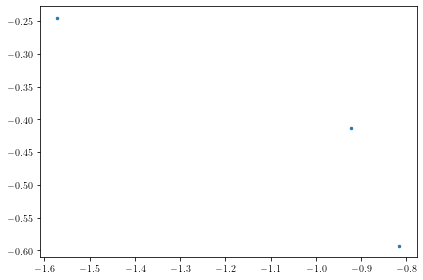

In [11]:
# look at the three different possible flattenings 
U, w, Vt = np.linalg.svd(data)

data = (Vt @ data.T)

plt.scatter(data[:,0], data[:,1], s=6)
plt.show()

# eigenfaces

The eigenface dataset has 400 images that are taken from 40 people and is a great way to visualise PCA in higher dimensions. Each image is grayscale 64 x 64, so can be flattened into a 4096 dimension vector with values ranging from 0 to 1 for each pixel, below is an example image. As done previously, the principle components and their directions can be found from the SVD of the data matrix. 


You can project each image onto the principle component directions to get the image's coordinates in principle component space

$$\text{image} = \sum_i \sigma_i \mathbf v_i $$


These directions in 4096 dimensional space can be turned back into images, the examples with the six largest principle values can be seen below. 


Again, to transform into this basis you project the image vector onto each of the principle component directions. Equally, you can reconstruct the image vector by projecting then image vector in principle component basis onto the pixel space basis vectors (i.e. each pixel is a direction). 

But as discussed earlier, principle components with small values offer little information, so we can discard some. Below is how the face is reproduced with different number of principle components used. For example, if we use just 100 principle components we compress the image ~41 times whilst still having a recognisable face. (not counting the face that we have the store the principle components and their directions).

In [98]:
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

(400, 64, 64)


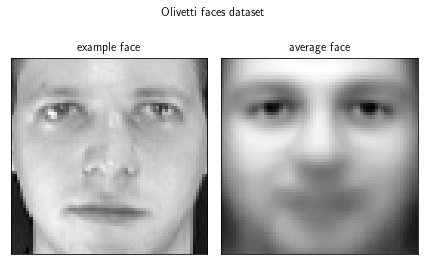

In [101]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Olivetti faces dataset')

axs[0].imshow(imgs[0].reshape(64,64), cmap='gray')
axs[0].set_title('example face')

axs[1].imshow(np.mean(imgs, axis=0).reshape(64,64), cmap='gray')
axs[1].set_title('average face')

axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])

#plt.savefig('olivetti_dataset.png')
plt.show()


In [102]:
imgs = imgs.reshape(400, -1)
U, w, Vt = np.linalg.svd(imgs)

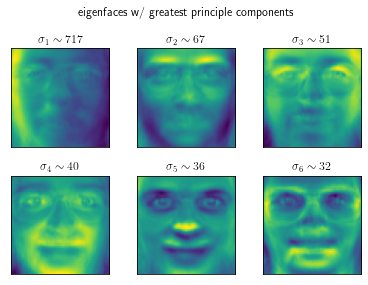

In [105]:
# first 6 eigenfaces
fig, axs = plt.subplots(2, 3)
fig.suptitle('eigenfaces w/ greatest principle components')

for k in range(1,7):
    
    i = 1 if (k - 1) >= 3 else 0
    j = (k - 1) % 3
    
    img = Vt[k].reshape(64,64)
    
    axs[i,j].imshow(img)
    axs[i,j].set_title(f'$\sigma_{k} \sim {round(w[k - 1])}$')
    
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])
    
# plt.savefig('principle_components.png')

In [106]:
def reconstruct_img(img, Vt, i, j, n_components=400, title=None):
    
    img = img.flatten()
    coef = Vt @ img
    linear_comb = coef[:n_components] * Vt.T[:,:n_components]
    reconstructed_arr = np.mean(linear_comb, axis=-1).reshape(64,64)
    
    axs[i,j].imshow(reconstructed_arr, cmap='gray')
    
    if title:
        axs[i,j].set_title(title)
        
    else:
        axs[i,j].set_title(f'{n_components/400 * 100}\%')
    
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])

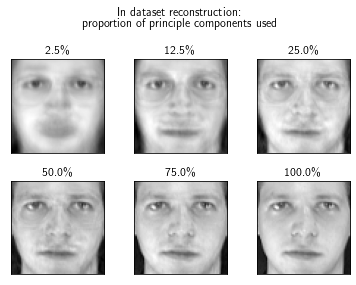

In [108]:
# reconstruction example
fig, axs = plt.subplots(2, 3)
fig.suptitle('In dataset reconstruction: \n proportion of principle components used')

reconstruct_img(imgs[0], Vt, 0, 0, n_components=10)
reconstruct_img(imgs[0], Vt, 0, 1, n_components=50)
reconstruct_img(imgs[0], Vt, 0, 2, n_components=100)
reconstruct_img(imgs[0], Vt, 1, 0, n_components=200)
reconstruct_img(imgs[0], Vt, 1, 1, n_components=300)
reconstruct_img(imgs[0], Vt, 1, 2, n_components=400)

# plt.savefig('imperfect_reconstruction.png')

In [18]:
plt.title('decay of principle components')
plt.plot(w, cmap=)
plt.ylabel('principle component value')
plt.xlabel('principle component \#')
plt.show()

SyntaxError: invalid syntax (3932152035.py, line 2)

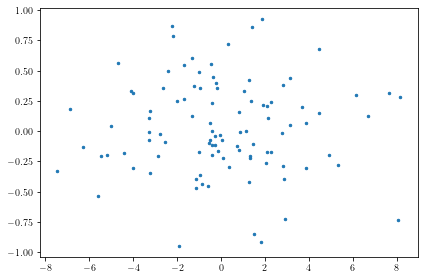

In [311]:
plt.scatter(data[:,0], data[:,2], s=6)
plt.show()

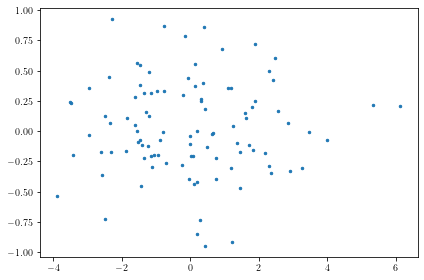

In [312]:
plt.scatter(data[:,1], data[:,2], s=6)
plt.show()

# Eigenfaces

The olivetti face dataset is made up of 10 different images of 40 people for a total of 400 images. The $64 \times 64$ photos can be flattened into a $4096$ vector. We can then carry out PCA to find the directions in which the 

# Reconstruction out of the dataset

For the eigenfaces dataset there are only 400 principle components and directions as the rank of the matrix is 400. 

This means there are 400 basis vectors to describe a 4096 dimensional space, so the this basis does not span the entire space of 64 x 64 images. Though we fully span the space of images in the dataset as this is how we came up with the principal component directions in the first place. 

For this reason, it is not possible to completely reproduce an image outside of the dataset even when using all principle components. 

In [109]:
face_arr = np.load('face_arr.npy')
car_arr = np.load('car_arr.npy')

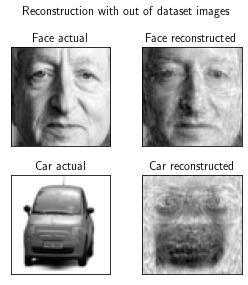

In [111]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Reconstruction with out of dataset images')

axs[0, 0].imshow(face_arr, cmap='gray')
axs[0, 0].set_title('Face actual')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[1, 0].imshow(car_arr, cmap='gray')
axs[1, 0].set_title('Car actual')    
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

reconstruct_img(face_arr, Vt, 0, 1, title='Face reconstructed')
reconstruct_img(car_arr, Vt, 1, 1, title='Car reconstructed')

plt.savefig('ood_reconstruction.png')

Below are two examples of how well out principle components reproduce it. Although neither are perfect, the out of dataset face is reproduced much more faithfully than the image of the car. The sketch below shows how the space spanned by the principle components has much more over lap with the out of dataset face than the car, perhaps as you may expect. 

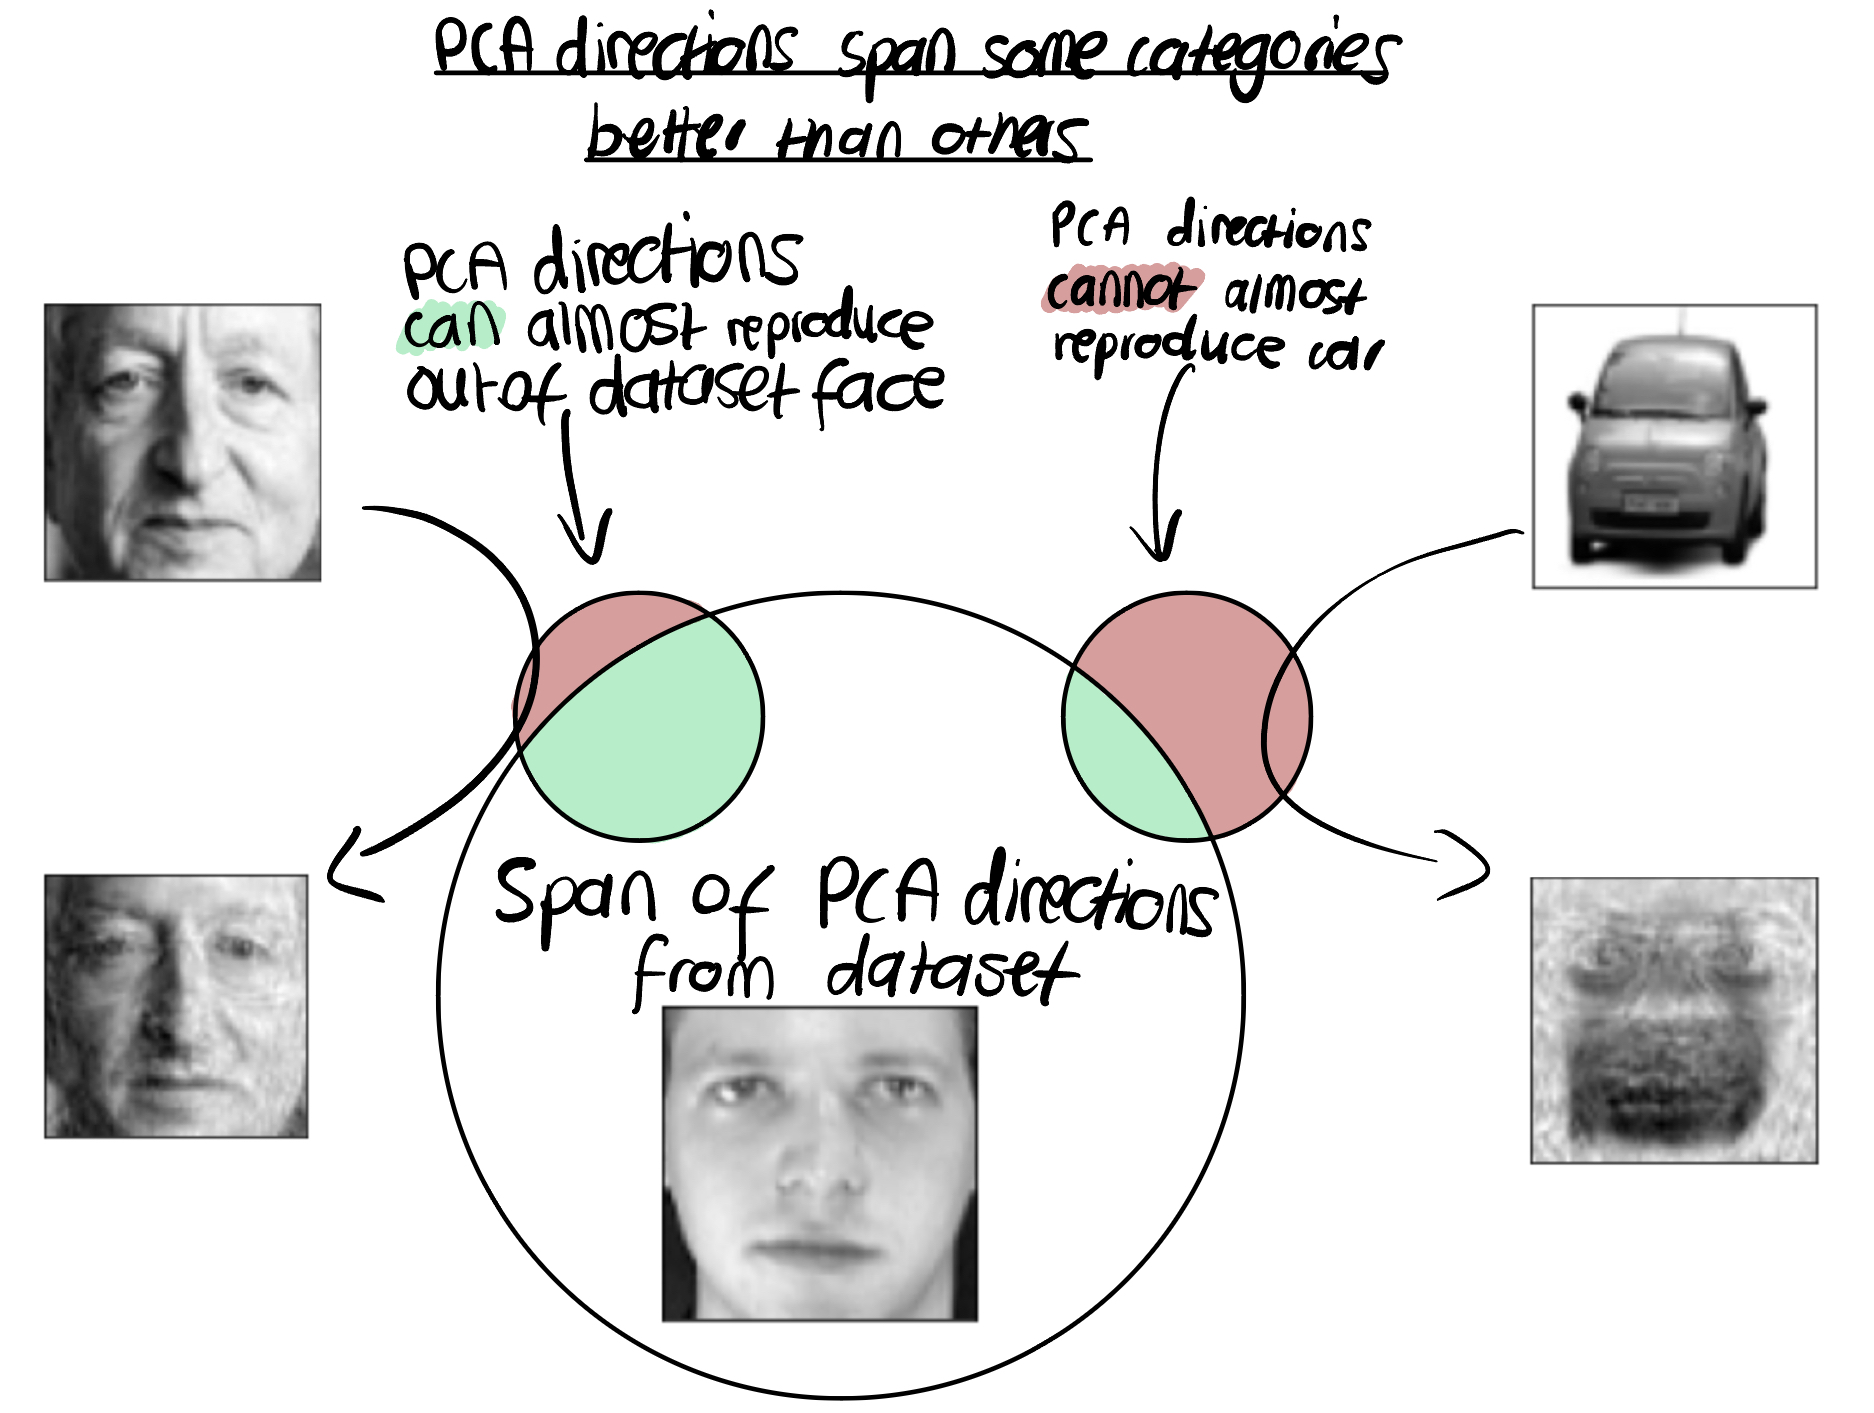

# Reconstructing out of the dataset